In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

# Problem 1

Here I am trying to figure out how to elimiate bad data without eliminating too much of the good data. I am given 100k good data and 8 random bad data.

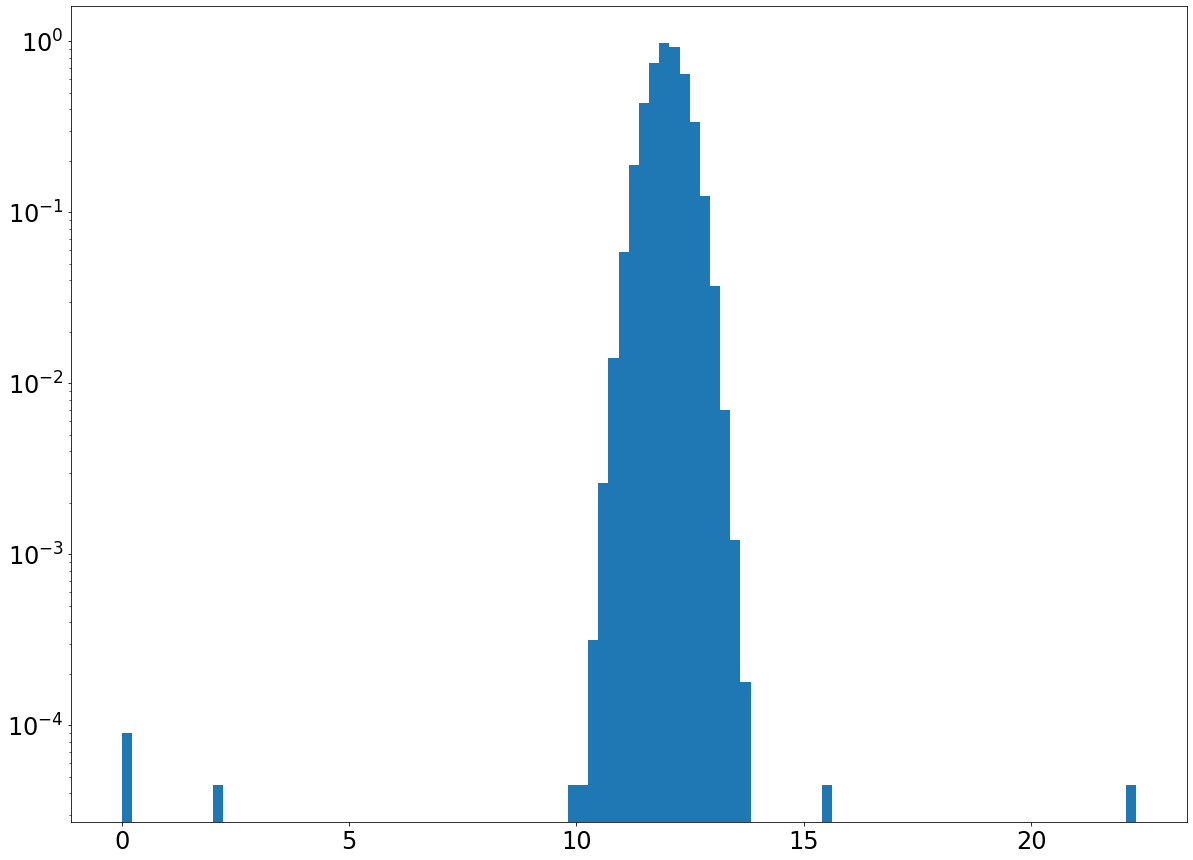

In [3]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()



To figure out how to get rid the bad data, I first plotted a gaussian distribution. By looking at the gaussian distribution and the location of the bad data, I can see how closely the data sets behave or do not behave.


Now, to eliminate the bad data, I am asking myself the following statistical question: Given that the temperature reading has Gaussian distribution, where do we set the cut off threshold to eliminate as much bad data but minimize the amount of good data getting thrown out?

I am choosing this to be my statistical question because, where we set the trhehold will have a impact on the overall distribution of the data and the quality of data. Given that the amount of bad data is small compared to the amount of the good data, eliminating keeping some bad data does less harm than getting rid of the good data.

To solve this question mathematically, I should take the following steps:

1) Set x values for both tails and eliminate all datas from the array of data set containing both good and bad data.

2) Construct a truth table 

3) Calculate the diagonal to see how much of the good data and bad data are being eliminated

4) Calculated the probability of the good data being eliminated by changing the threshold value


In [12]:
bad_data = np.asarray([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

# Cutting off bad data below 10 and greater than 14
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
d_mod = d[(d >= 10) & (d <= 14)]

eliminated_bad_data = bad_data[(bad_data >= 10) & (bad_data <= 14)]

True_bad_test_bad = 8 - eliminated_bad_data.size
True_good_test_good = d_mod.size - (bad_data.size - True_bad_test_bad)
True_good_test_bad = 100000 - True_good_test_good
True_bad_test_good = bad_data.size - True_bad_test_bad
diagonal = True_good_test_bad+True_bad_test_good
omissions = True_good_test_bad/d.size 


print('Truth table: Data cut off at values less than 10 and greater than 14')
print()
names = ['Test Good', 'Test Bad']
True_good_test_good = [True_good_test_good, True_good_test_bad]
True_good_test_bad = [True_bad_test_good, True_bad_test_bad]

titles = [' ','True Good', 'True Bad']
data = [titles] + list(zip(names, True_good_test_good, True_good_test_bad))

for i, d in enumerate(data):
    line = '|'.join(str(x).ljust(22) for x in d)
    print(line)
    if i == 0:
        print('-' * len(line))
print('The total number of error/diagonal = {:.0f}'.format(diagonal))
print('The probability of omissions = {:.2%}'.format(omissions)) 



print()
print()
print('Truth table: Data cut off at values less than 10.5 and greater than 13.5')
print()
# Cutting off bad data below 10.5 and greater than 13.5
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
d_mod = d[(d >= 10.5) & (d <= 13.5)]

eliminated_bad_data = bad_data[(bad_data >= 10) & (bad_data <= 14)]

True_bad_test_bad = 8 - eliminated_bad_data.size
True_good_test_good = d_mod.size - (bad_data.size - True_bad_test_bad)
True_good_test_bad = 100000 - True_good_test_good
True_bad_test_good = bad_data.size - True_bad_test_bad
diagonal = True_good_test_bad+True_bad_test_good
omissions = True_good_test_bad/d.size

names = ['Test Good', 'Test Bad']
True_good_test_good = [True_good_test_good, True_good_test_bad]
True_good_test_bad = [True_bad_test_good, True_bad_test_bad]

titles = [' ','True Good', 'True Bad']
data = [titles] + list(zip(names, True_good_test_good, True_good_test_bad))

for i, d in enumerate(data):
    line = '|'.join(str(x).ljust(22) for x in d)
    print(line)
    if i == 0:
        print('-' * len(line))

print('The total number of error/diagonal = {:.0f}'.format(diagonal)) 
print('The probability of omissions = {:.2%}'.format(omissions)) 
print()


Truth table: Data cut off at values less than 10 and greater than 14

                      |True Good             |True Bad              
--------------------------------------------------------------------
Test Good             |100000                |3                     
Test Bad              |0                     |5                     
The total number of error/diagonal = 3
The probability of omissions = 0.00%


Truth table: Data cut off at values less than 10.5 and greater than 13.5

                      |True Good             |True Bad              
--------------------------------------------------------------------
Test Good             |99979                 |3                     
Test Bad              |21                    |5                     
The total number of error/diagonal = 24
The probability of omissions = 0.02%



As you can see, the number of omissions increases as we change the threshold value to something closer to the mean value.
Since the data distribution has a shape of guassian distribution, we know how much percentage of data is included in each interval of x values. As we change the statistical threshold value closer  and closer to the mean value, we know how much proportion of the good data gets thrown out. The number of omission can be calculated by using the pdf of the gaussian distribution so the number of omission is predictable.



Furthermore, depending on where you set your priotiry the probability of omission and commission can change.  It all  depends on you statistical threshold. If you set your threshold far from the mean value, you can reduce the amount of omissions but you do increase the risk of more comission. Whereas if you set the threshold very close to the mean, you can reduce the amount of comission but increase the amount of omission. 

# Problem 2
In this section, I am studying the imaging of the stars' position in the sky which has 2D gaussian distribution. And using this information to figure out what kind of movement in these imaging I need to detect to find an astroid. So I am trying to answer the following statistical question:

In [ ]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax);

If the imaging of the stars position in the sky can be described by a 2D gaussian distribution, where the mean describes the most positionally stable stars, how much distance of movement does an image need to show for it to be an astoid?

To solve my statistical question, I will have to take the following mathematical steps:

1. This position uncertainty distrubtion has a 2D gaussian distribution. We are looking for a change in distance in arcseconds which is the amplitude of the deltaX and deltaY vector. This means the pdf has a Rayleigh distribution because Rayleight distribution is the amplitude of 2D gaussian distribution.

2. Calculate the 5sigma probability using gaussian distribution
3. Find the x value of the Rayleigh distribution that corresponds to the 5sigma probability
4. If we detect a distance in arc second greater or equal to this 5sigma value, we can be sure it is an astroid and not a star.


Now, to find what distance in arcseconds represents a 5 sigma detection of motion, I am executing the following codes:

In [58]:
five_sigma_prob = 1- stats.norm.cdf(5)
print('The 5sigma probability is = {:.10%}'.format(five_sigma_prob))

five_sigma_distance = stats.rayleigh.ppf(1-five_sigma_prob)
print('The distance in arcseconds that represents a 5 sigma detection of motion is = {:5f}'.format(five_sigma_distance) + ' arcseconds')

The 5sigma probability is = 0.0000286652%
The distance in arcseconds that represents a 5 sigma detection of motion is = 5.489080 arcseconds


5.5 arcseconds of distance is what kind of motion I need to detect to find an astroid.

# Problem 3

I am conducting a moon shadow detection and trying to figure out how significant my detection is. I have information showing that the average signal I get per minute is 1 signal. Given that we have mean for a specific interval of time and this mean is a very small number, we can deduce our background distribution to be a Poisson distribution. So now my statistical question is as follows:




If the background cosimic ray has a poission distribution with mu = 1 cosmic ray per minute, what is the significance of observing 6800 cosimic rays 8 hours a night for 15 days or equivalently in 7200 minutes? 


To answer the above statistical question we need to take the following mathmatical steps:

First find the distrubution of detecting 6800 cosmic rays for 7200 minute given the initial background distribution of poisson distriubtion with mu =1. This requires a convolution of the background distribution for 7200 times because we are looking for a probability distribution of detecting cosmic rays for 7200 minutes. Because the original distribution is a poisson distribution, we can expect the distribution to remain poisson even after 7200 convolution. The mu of the new distribution is the original mu times the number of iteration so the mu for the new distribution is 7200. This is true because this is the unique property of a poisson distribution that the more samples we add to the distriubiton the mean gets larger by the number of additional samples.

Now, we take an integral of this new distriubtion from negative infinity to 6800 to find the probability of detecting 6800 cosimic rays in 7200 minutes.

Finally, translate this probability to gaussian distribution probability to find the sigma value. The significance of our detection is this sigma value. 

Below it shows the actual executing of above described mathematical steps to find the sigma:

In [56]:
prob =  stats.poisson.cdf(6800,7200)

sigma = stats.norm.ppf(prob)
print('The equivalent sigma for 6800 cosmic rays is = {:.3f}'.format(sigma))
print()

The equivalent sigma for 6800 cosmic rays is = -4.751



In [55]:
five_sigma_prob = 1- stats.norm.cdf(5)
print('The 5sigma probability is = {:.10%}'.format(five_sigma_prob))

five_sigma_count = stats.poisson.ppf(five_sigma_prob,7200)
print('The 5 sigma equivalent cosmic rays = {:.0f}'.format(five_sigma_count))

The 5sigma probability is = 0.0000286652%
The 5 sigma equivalent cosmic rays = 6780


The significance of the detected cosmic ray 6800 is 4.75 sigma. If we wanted to call our detection a discovery, we should have detected something less than 6780 which is the 5sigma equaivalent cosmic rays.